In [94]:
import numpy as np

a = np.ones(shape=(4,5))
print(a)
print(a[1:])
# m = 10
# a = np.ones(shape=(m,1))
# b = np.zeros(shape=(m, 10))
# c = np.column_stack((a,b))
# print(c)

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


iteration 0 | cost 630.342730
iteration 100 | cost 197.714906
iteration 200 | cost 193.365689
iteration 300 | cost 189.128196
iteration 400 | cost 184.999558
iteration 500 | cost 180.976977
iteration 600 | cost 177.057731
iteration 700 | cost 173.239163
iteration 800 | cost 169.518688
iteration 900 | cost 165.893787
iteration 1000 | cost 162.362003
iteration 1100 | cost 158.920945
iteration 1200 | cost 155.568282
iteration 1300 | cost 152.301744
iteration 1400 | cost 149.119117
iteration 1500 | cost 146.018248
iteration 1600 | cost 142.997034
iteration 1700 | cost 140.053431
iteration 1800 | cost 137.185444
iteration 1900 | cost 134.391131
iteration 2000 | cost 131.668600
iteration 2100 | cost 129.016006
iteration 2200 | cost 126.431553
iteration 2300 | cost 123.913490
iteration 2400 | cost 121.460112
iteration 2500 | cost 119.069758
iteration 2600 | cost 116.740808
iteration 2700 | cost 114.471684
iteration 2800 | cost 112.260851
iteration 2900 | cost 110.106811
iteration 3000 | cost 

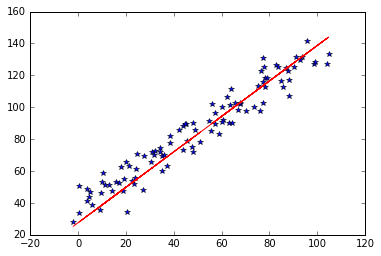

In [103]:
# Example from http://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

def gradientDescent(x, y, theta, alpha, numIter):
    '''
    
    Parameters
    ----------
    
    x: m by n numpy feature matrix, one row per sample
    y: m by 1 numpy response variable column vector, one row per sample
    theta: n by 1 feature weights
    alpha: learning rate
    numIter: max number of iterations to run
    
    '''
    # m is the number of samples.
    # n is the number of features.
    m, n = x.shape
    
    # Prepend x and theta with a column of ones.
    # Explained here: http://stats.stackexchange.com/questions/181603
    x = np.column_stack((np.ones(shape=(m,1)),x))
    theta = np.concatenate((np.ones(1), theta), axis=0)
    
    # Transpose for multiplication. xT is n * m.
    xT = x.transpose()
    
    for i in range(0, numIter):
        
        # Get the current hypothesis by multiplying the feature matrix by the theta weights.
        # x dot theta is (m by n) * (n by 1)
        hypothesis = np.dot(x, theta)
                
        # Calculate the error from this hypothesis.
        # This is vectorized, error will be (m by 1)
        error = hypothesis - y
        
        # Get mean squared error, helpful for printing for each iteration.
        meanSquaredError = np.sum(error ** 2) / (2*m)
        if i % 100 == 0:
            print('iteration %d | cost %f' % (i, meanSquaredError))
        
        # Calculate the gradient, gradient will be (m by 1).
        gradient = (1/m) * np.dot(xT, error)
        
        # Update the weights based on the gradient.
        theta = theta - (alpha * gradient)
    
    # Change x back to the way it was passed in.
    x = x[:,1:]
    
    # Return the last m columns.
    return theta

def predict(x, theta):
    # Prepend x and theta with a column of ones.
    # Explained here: http://stats.stackexchange.com/questions/181603
    x = np.column_stack((np.ones(shape=(m,1)),x))
    prediction = np.dot(x,theta)
    x = x[:,1:]
    return prediction
    

def randomData(numSamples, numFeatures, bias, variance):
    x = np.zeros(shape=(numSamples, numFeatures))
    y = np.zeros(shape=numSamples)
    # basically a straight line
    for i in range(0, numSamples):
        for j in range(0, numFeatures):
            dist = random.uniform(0,20)
            x[i][j] = i + random.uniform(-dist,dist)
        # Target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

x, y = randomData(100, 1, 25, 20)
m, n = np.shape(x)
theta = np.ones(n)
alpha = 0.0005
numIter = 10000

# Get the weights.
theta = gradientDescent(x, y, theta, alpha, numIter)
predicted = predict(x, theta)

# Plot
plt.plot(x,y, 'b*')
plt.plot(x,predicted,'r')